# Random Forest

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

#Load dataset
penguins = pd.read_csv('penguins_size.csv').dropna()

# print the label species 
print(penguins['species'].unique())

penguins.head()

['Adelie' 'Chinstrap' 'Gentoo']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [2]:
X=penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']] # Features
y=penguins['species'] # Labels

# Split the dataset into training set and test set
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3) # 70% for training

# Create the Classifier
clf = RandomForestClassifier() 

# Train the model using the training set
clf.fit(X_train ,y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test , y_pred))

Accuracy: 0.9801980198019802


In [3]:
# --->>> Your Turn <<<---
# Experiment with the following parameters:
#  - n_estimators
#  - max_depth
#  - max_features
#  - bootstrap
# See: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Write down your observations

In [4]:
# Create the Classifier
# define a random_state to make it reproducible
n_estimators = np.arange(1,101,1)
df = pd.DataFrame(columns=['accuracy','dataset','n_estimators'])

for n in n_estimators:
    clf = RandomForestClassifier(random_state=1,
                                 n_estimators=n,
                                ) 
    # Train the model using the training set
    clf.fit(X_train ,y_train)
    # Make predictions on the test set
    df.loc[len(df)] = [accuracy_score(y_train, clf.predict(X_train)),
                       'train',n]
    df.loc[len(df)] = [accuracy_score(y_test, clf.predict(X_test)),
                       'test',n]


<Axes: xlabel='n_estimators', ylabel='accuracy'>

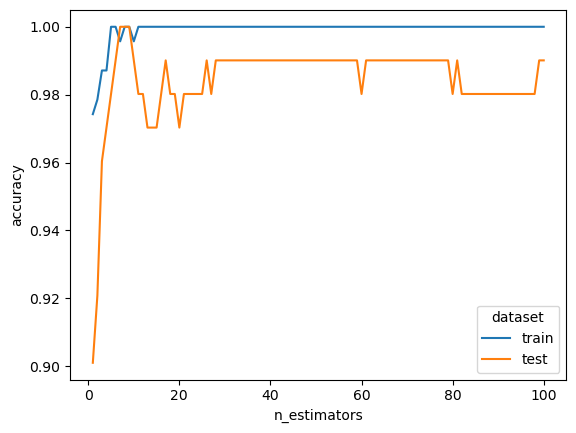

In [5]:
sns.lineplot(df, x='n_estimators',y='accuracy',hue='dataset')

# Generalisation Error Estimate with Out-Of-Bag-Error

In [6]:
# see https://scikit-learn.org/1.5/auto_examples/ensemble/plot_ensemble_oob.html
oob_score=True,

# Create the Classifier
# define a random_state to make it reproducible
#import numpy as np
n_estimators = np.arange(30, 151, 10)
df = pd.DataFrame(columns=['n_estimators','oob_error'])

for n in n_estimators:
    clf = RandomForestClassifier(random_state=1,
                             n_estimators=n,
                             oob_score=True) 
    # Train the model using the training set
    clf.fit(X_train ,y_train)
    # Make predictions on the test set
    df.loc[len(df)] = [n,1 - clf.oob_score_]

<Axes: xlabel='n_estimators', ylabel='oob_error'>

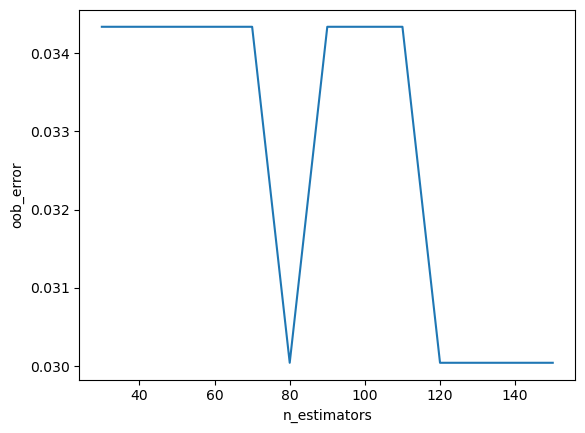

In [7]:
sns.lineplot(df, x='n_estimators',y='oob_error')

## Random Forest on digits dataset

In [8]:
# load data
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.9) 

In [9]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_samples=1.0) 
clf.fit(X_train ,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test , y_pred))

Accuracy: 0.8881334981458591


In [ ]:
# see https://scikit-learn.org/1.5/auto_examples/ensemble/plot_ensemble_oob.html
oob_score=True

# Create the Classifier
# define a random_state to make it reproducible
import numpy as np
n_estimators = np.arange(20,1001,10)
df = pd.DataFrame(columns=['n_estimators','oob_error','train_accuracy','test_accuracy'])

for n in n_estimators:
    clf = RandomForestClassifier(random_state=1,
                             n_estimators=n,
                             oob_score=True) 
    # Train the model using the training set
    clf.fit(X_train ,y_train)
    # Make predictions on the test set
    df.loc[len(df)] = [n,1 - clf.oob_score_, 
                       accuracy_score(y_train , clf.predict(X_train)), 
                       accuracy_score(y_test , clf.predict(X_test))]

<Axes: xlabel='n_estimators', ylabel='oob_error'>

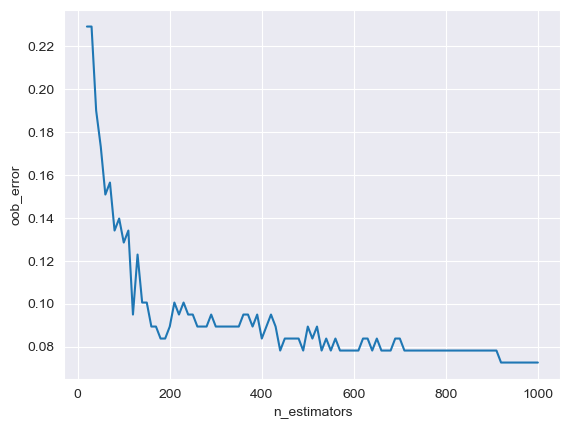

In [ ]:
sns.lineplot(df, x='n_estimators',y='oob_error')

Text(0.5, 1.0, 'Train vs Test Accuracy')

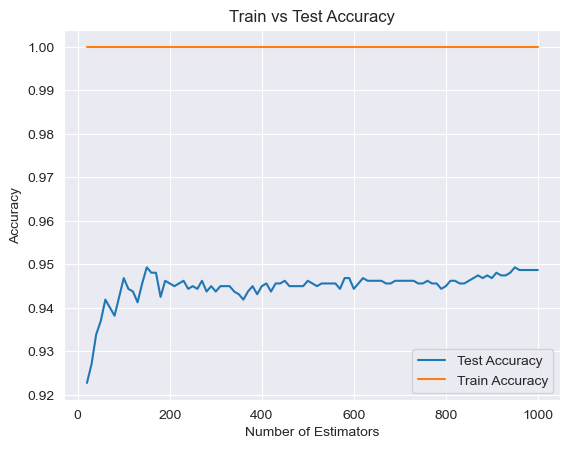

In [ ]:
sns.lineplot(df, x='n_estimators',y='test_accuracy', label='Test Accuracy')
sns.lineplot(df, x='n_estimators',y='train_accuracy', label='Train Accuracy')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy")